# DIRTY NOTEBOOK

##### Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangle as w



warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#wrangle is working now after adding tocsv and zillow17 to wrangle_zillow
df = w.wrangle_zillow()

In [3]:
df.head().T

parcelid,10711855,10711877,10711888,10711910,10711923
Unnamed: 0,0,1,2,3,4
bathrooms,2,2,2,2,2
bedrooms,3,4,4,3,4
property_quality,8,8,8,8,8
sqft,2107,1882,1882,1477,1918
fips,6037,6037,6037,6037,6037
latitude,3.42226e+07,3.42203e+07,3.42225e+07,3.42219e+07,3.42206e+07
longitude,-1.18617e+08,-1.18616e+08,-1.18617e+08,-1.18616e+08,-1.18615e+08
lot_sqft,9158,9035,9800,11285,11239
rawcensustractandblock,6.03711e+07,6.03711e+07,6.03711e+07,6.03711e+07,6.03711e+07


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
dummies = pd.get_dummies(df.county)
dummies.columns = ['LA', 'Orange', 'Ventura']
df = pd.concat([df, dummies], axis=1)

In [6]:
#DF TO EXPLORE
new = df[['LA', 'Orange', 'Ventura', 'fips','latitude', 'longitude', 'sqft', 'lot_sqft', 'zip_code', 'property_quality', 'home_age', 'logerror']].copy()

In [7]:
new.head().T

parcelid,10711855,10711877,10711888,10711910,10711923
LA,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Orange,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Ventura,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fips,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03
latitude,3.422256e+07,3.422026e+07,3.422249e+07,3.422186e+07,3.422062e+07
longitude,-1.186174e+08,-1.186164e+08,-1.186169e+08,-1.186157e+08,-1.186153e+08
sqft,2.107000e+03,1.882000e+03,1.882000e+03,1.477000e+03,1.918000e+03
lot_sqft,9.158000e+03,9.035000e+03,9.800000e+03,1.128500e+04,1.123900e+04
zip_code,9.633900e+04,9.633900e+04,9.633900e+04,9.633900e+04,9.633900e+04
property_quality,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00


In [8]:
def train_validate_test_split(df, target, seed):
    '''
    spilts our data  into train, validate, test
    '''
    # Train, Validate, and test
    train_and_validate, test = train_test_split(
        df, test_size=0.2, random_state=seed)
    train, validate = train_test_split(
        train_and_validate,
        test_size=0.3,
        random_state=seed)
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test  

In [9]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test_split(new, 'logerror', 123)

In [10]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (40217, 12)
validate -> (17237, 12)
test -> (14364, 12)


In [11]:
train.head().T

parcelid,13883635,17229059,14683223,12618057,11028834
LA,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Orange,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
Ventura,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fips,6.059000e+03,6.111000e+03,6.059000e+03,6.037000e+03,6.037000e+03
latitude,3.383557e+07,3.427958e+07,3.370762e+07,3.380662e+07,3.423458e+07
longitude,-1.178949e+08,-1.187740e+08,-1.177475e+08,-1.182574e+08,-1.184079e+08
sqft,1.156000e+03,1.278000e+03,1.378000e+03,7.760000e+02,1.275000e+03
lot_sqft,6.250000e+03,9.420000e+02,7.265000e+03,4.470000e+03,6.151000e+03
zip_code,9.702400e+04,9.711800e+04,9.695400e+04,9.622900e+04,9.636100e+04
property_quality,7.000000e+00,7.000000e+00,7.000000e+00,4.000000e+00,6.000000e+00


In [12]:
#columns_to_scale=['bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'lotsizesquarefeet', 'roomcnt', 'unitcnt', 
#'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'taxamount', 'longitude', 'latitude', 'age', 'taxrate', 'structure_dollar_per_sqft', 
#'land_dollar_per_sqft', 'bed_bath_ratio']

In [13]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [14]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

In [15]:
new.head().T

parcelid,10711855,10711877,10711888,10711910,10711923
LA,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Orange,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Ventura,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
fips,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03,6.037000e+03
latitude,3.422256e+07,3.422026e+07,3.422249e+07,3.422186e+07,3.422062e+07
longitude,-1.186174e+08,-1.186164e+08,-1.186169e+08,-1.186157e+08,-1.186153e+08
sqft,2.107000e+03,1.882000e+03,1.882000e+03,1.477000e+03,1.918000e+03
lot_sqft,9.158000e+03,9.035000e+03,9.800000e+03,1.128500e+04,1.123900e+04
zip_code,9.633900e+04,9.633900e+04,9.633900e+04,9.633900e+04,9.633900e+04
property_quality,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00


In [16]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71818 entries, 10711855 to 162960814
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LA                71818 non-null  uint8  
 1   Orange            71818 non-null  uint8  
 2   Ventura           71818 non-null  uint8  
 3   fips              71818 non-null  int64  
 4   latitude          71818 non-null  float64
 5   longitude         71818 non-null  float64
 6   sqft              71818 non-null  float64
 7   lot_sqft          71818 non-null  float64
 8   zip_code          71818 non-null  int64  
 9   property_quality  71818 non-null  int64  
 10  home_age          71818 non-null  int64  
 11  logerror          71818 non-null  float64
dtypes: float64(5), int64(4), uint8(3)
memory usage: 5.7 MB


In [17]:
new.columns

Index(['LA', 'Orange', 'Ventura', 'fips', 'latitude', 'longitude', 'sqft',
       'lot_sqft', 'zip_code', 'property_quality', 'home_age', 'logerror'],
      dtype='object')

In [18]:
def explore_univariate_quant(train, quant_var):
    '''
    takes in a dataframe and a quantitative variable and returns
    descriptive stats table, histogram, and boxplot of the distributions. 
    '''
    descriptive_stats = train[quant_var].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train[quant_var], color='lightseagreen')
    p = plt.title(quant_var)

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train[quant_var])
    p = plt.title(quant_var)
    return p, descriptive_stats

In [19]:
def explore_univariate(train, cat_vars, quant_vars):
    for var in cat_vars:
        explore_univariate_categorical(train, var)
        print('_________________________________________________________________')
    for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(train, col)
        plt.show(p)
        print(descriptive_stats)
        
def explore_bivariate(train, target, cat_vars, quant_vars):
    for cat in cat_vars:
        explore_bivariate_categorical(train, target, cat)
    for quant in quant_vars:
        explore_bivariate_quant(train, target, quant)

def explore_multivariate(train, target, cat_vars, quant_vars):
    '''
    '''
    plot_swarm_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    violin = plot_violin_grid_with_color(train, target, cat_vars, quant_vars)
    plt.show()
    pair = sns.pairplot(data=train, vars=quant_vars, hue='target')
    plt.show()
    plot_all_continuous_vars(train, 'target', quant_vars)
    plt.show()    


In [20]:
binary_vars = ['LA', 'Orange', 'Ventura']
cat_vars = []
quant_var = ['fips', 'latitude', 'longitude', 'sqft',
       'lot_sqft', 'zip_code', 'property_quality', 'home_age']
continuous_target = 'logerror'
categorical_target = 'logerror'

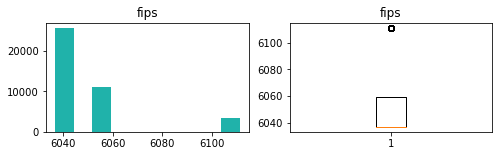

count    40217.000000
mean      6049.344431
std         21.069993
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64


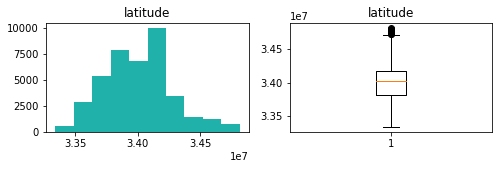

count    4.021700e+04
mean     3.400663e+07
std      2.677470e+05
min      3.333960e+07
25%      3.380982e+07
50%      3.401998e+07
75%      3.417682e+07
max      3.481877e+07
Name: latitude, dtype: float64


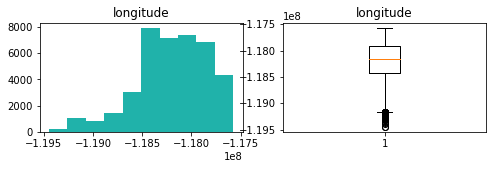

count    4.021700e+04
mean    -1.181997e+08
std      3.637078e+05
min     -1.194484e+08
25%     -1.184191e+08
50%     -1.181698e+08
75%     -1.179170e+08
max     -1.175724e+08
Name: longitude, dtype: float64


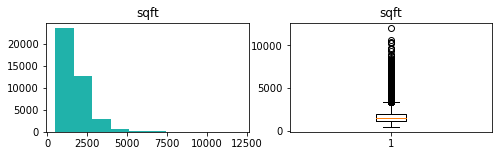

count    40217.000000
mean      1740.949201
std        873.647840
min        501.000000
25%       1172.000000
50%       1516.000000
75%       2057.000000
max      12039.000000
Name: sqft, dtype: float64


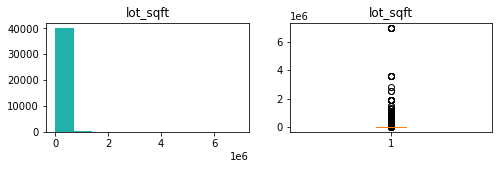

count    4.021700e+04
mean     2.823631e+04
std      1.256387e+05
min      4.350000e+02
25%      5.972000e+03
50%      7.265000e+03
75%      1.061000e+04
max      6.971010e+06
Name: lot_sqft, dtype: float64


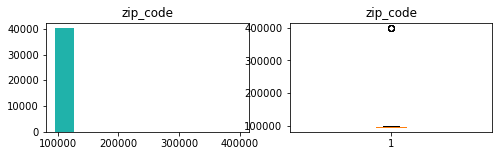

count     40217.000000
mean      96602.276401
std        3725.023733
min       95982.000000
25%       96208.000000
50%       96410.000000
75%       96989.000000
max      399675.000000
Name: zip_code, dtype: float64


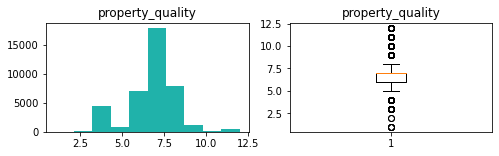

count    40217.000000
mean         6.762041
std          1.351777
min          1.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         12.000000
Name: property_quality, dtype: float64


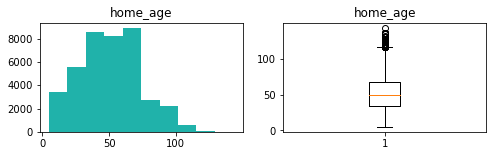

count    40217.000000
mean        51.380585
std         22.846035
min          5.000000
25%         34.000000
50%         50.000000
75%         67.000000
max        143.000000
Name: home_age, dtype: float64


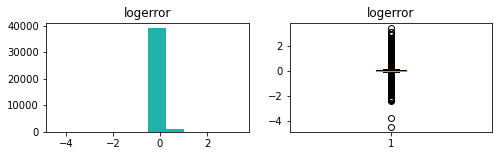

count    40217.000000
mean         0.016592
std          0.164459
min         -4.453964
25%         -0.023593
50%          0.006632
75%          0.037786
max          3.394544
Name: logerror, dtype: float64


In [21]:
cat_vars = []
quant_vars = ['fips', 'latitude', 'longitude', 'sqft',
       'lot_sqft', 'zip_code', 'property_quality', 'home_age', 'logerror']

explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

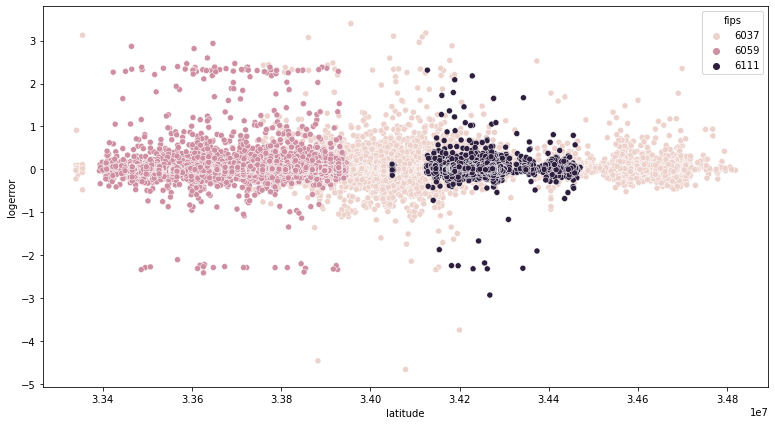

In [22]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='latitude', y='logerror', hue='fips')

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

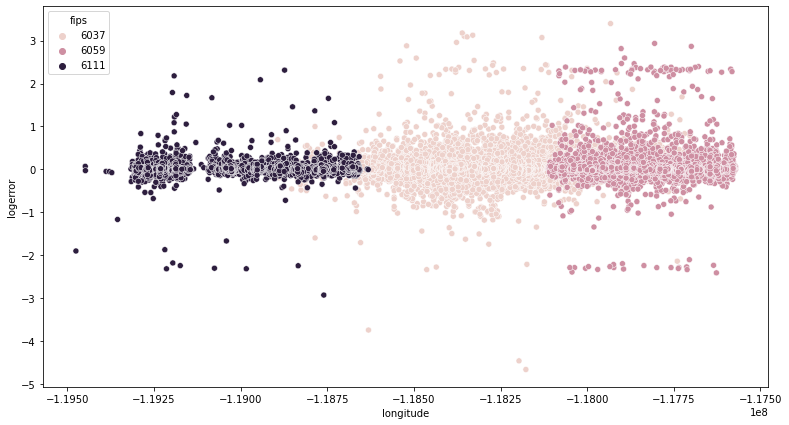

In [23]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='longitude', y='logerror', hue='fips')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

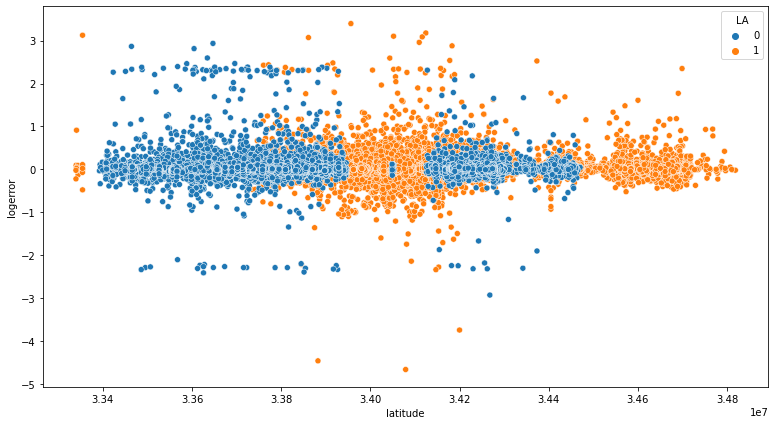

In [24]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='latitude', y='logerror', hue='LA')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

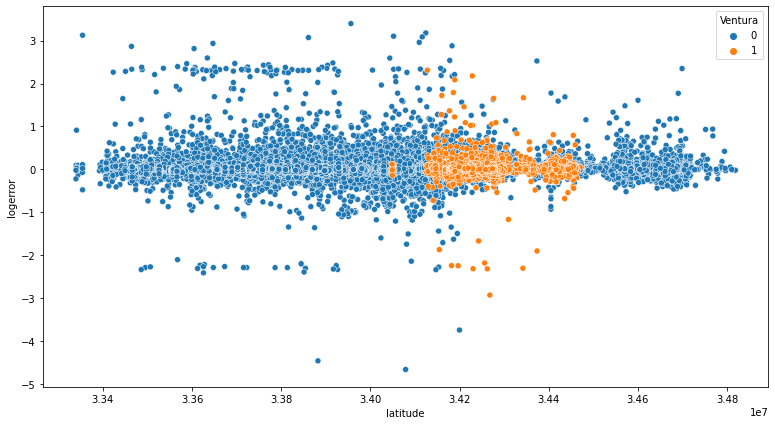

In [25]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='latitude', y='logerror', hue='Ventura')

<AxesSubplot:xlabel='latitude', ylabel='logerror'>

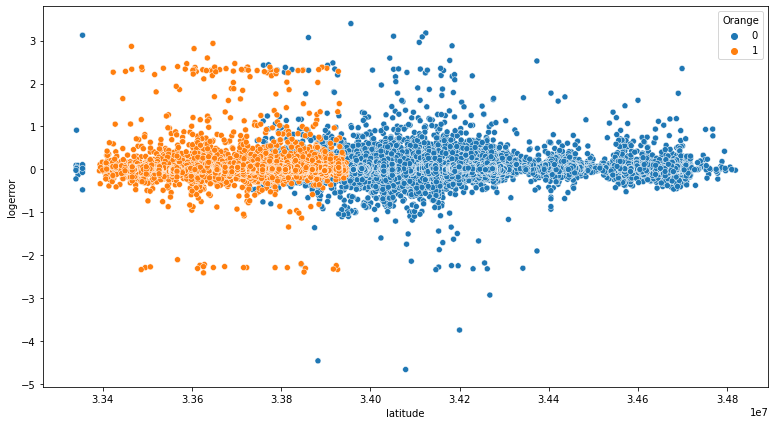

In [26]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='latitude', y='logerror', hue='Orange')

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

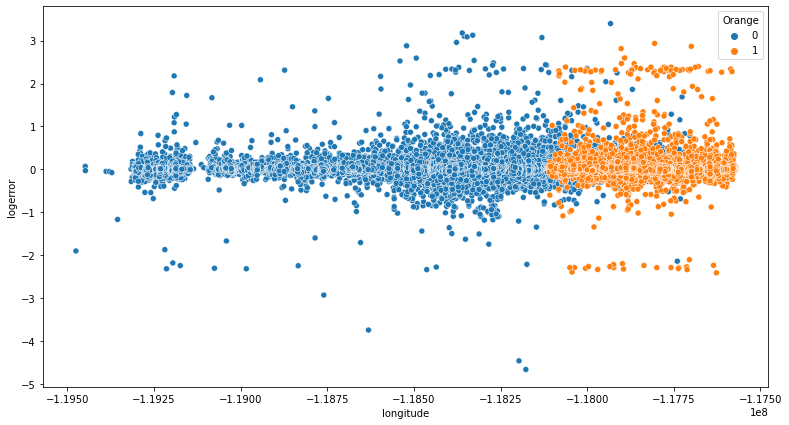

In [27]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='longitude', y='logerror', hue='Orange')

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

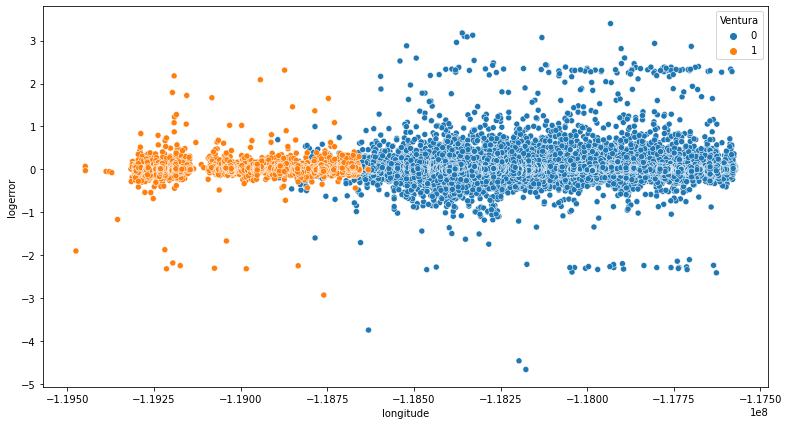

In [28]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='longitude', y='logerror', hue='Ventura')

<AxesSubplot:xlabel='longitude', ylabel='logerror'>

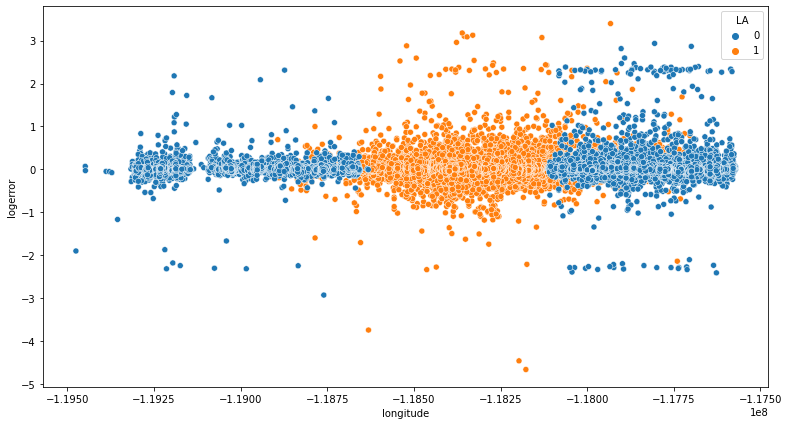

In [29]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='longitude', y='logerror', hue='LA')

<AxesSubplot:xlabel='property_quality', ylabel='logerror'>

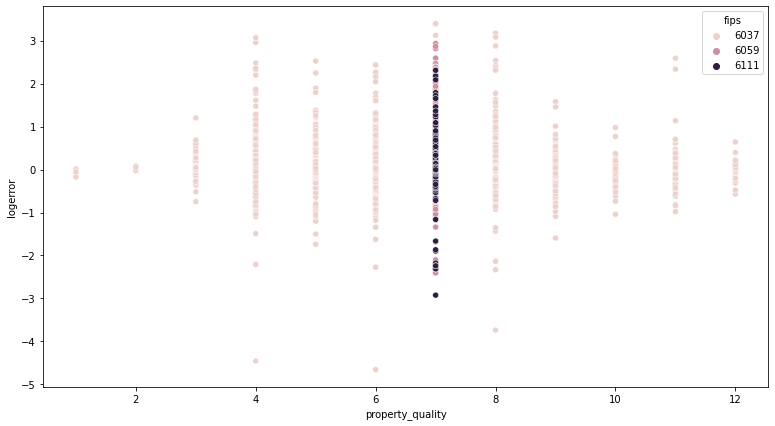

In [54]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='property_quality', y='logerror', hue='fips')

<AxesSubplot:xlabel='property_quality', ylabel='logerror'>

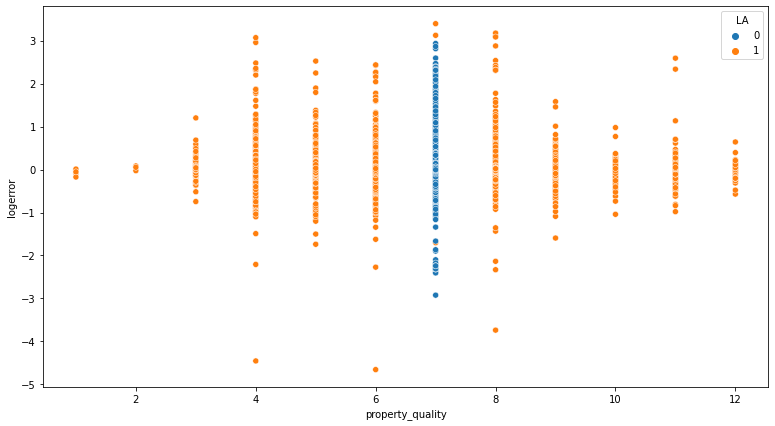

In [53]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='property_quality', y='logerror', hue='LA')

<AxesSubplot:xlabel='property_quality', ylabel='logerror'>

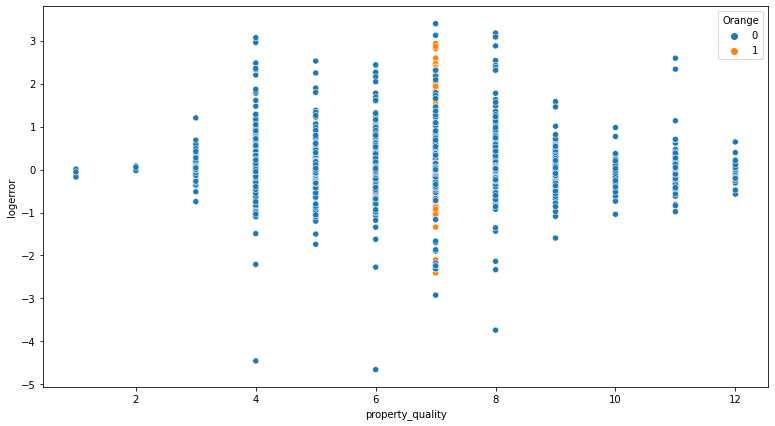

In [55]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='property_quality', y='logerror', hue='Orange')

<AxesSubplot:xlabel='property_quality', ylabel='logerror'>

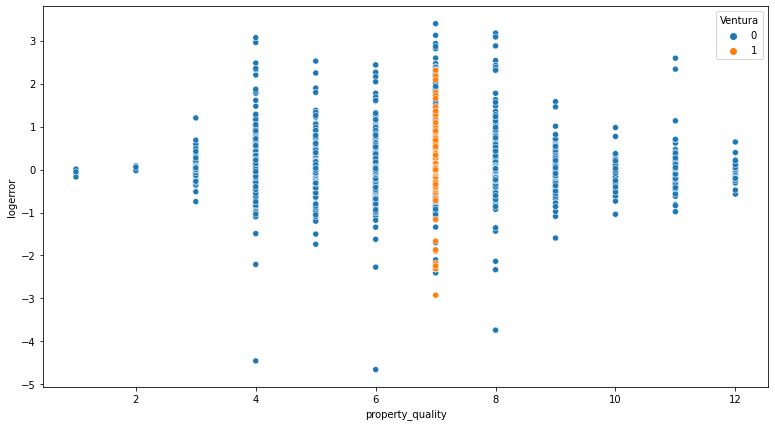

In [56]:
plt.figure(figsize=(13, 7))
sns.scatterplot(data=new, x='property_quality', y='logerror', hue='Ventura')

## Hypothesis testing:
- Is logerror significantly different for properties in LA County vs Orange County? 
- Is logerror significantly different for properties in LA County Vs Ventura County?
- Is logerror significantly different for properties in Orange County vs Ventura County?


In [40]:
#set confidence interval and alpha before the test
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

In [35]:
LA = train[train.LA == 1].logerror
Orange = train[train.Orange == 1].logerror
Ventura = train[train.Ventura == 1].logerror

In [36]:
mean_log_la = LA.mean()
mean_log_orange = Orange.mean()
mean_log_ventura = Ventura.mean()

#### Average logerror by county

In [39]:
print('LA: ', mean_log_la)
print('Orange: ', mean_log_orange)
print('Ventura:', mean_log_ventura)

LA:  0.014343426993607458
Orange:  0.021902298586902045
Ventura: 0.016160619639269326


### Is logerror significantly different for properties in LA County vs Orange County?

In [45]:
#correlation test summary
def stat_summary(p):
    if p < alpha:
        print(f'Pvalue is: {p} is less than alpha: {alpha}')
        print("Reject the null hypothesis because there is a significant difference present")
    else:
        print(f'Pvalue is: {p} is greater than alpha: {alpha}')
        print("We fail to reject the null hypothesis because there is no significant difference present")

In [46]:
t, p = stats.ttest_ind(LA, Orange, equal_var=False)

In [47]:
t, p

(-3.746921716099031, 0.00017956910744843356)

In [48]:
stat_summary(p)

Pvalue is: 0.00017956910744843356 is less than alpha: 0.050000000000000044
Reject the null hypothesis because there is a significant difference present


### Is logerror significantly different for properties in LA County Vs Ventura County?

In [49]:
t, p = stats.ttest_ind(LA, Ventura, equal_var=False)
t,p

(-0.6747675092399762, 0.49985829401782256)

In [50]:
stat_summary(p)

Pvalue is: 0.49985829401782256 is greater than alpha: 0.050000000000000044
We fail to reject the null hypothesis because there is no significant difference present


### Is logerror significantly different for properties in Orange County vs Ventura County?

In [51]:
t, p = stats.ttest_ind(Orange, Ventura, equal_var=False)
t,p

(1.8707935518667698, 0.06141505949169728)

In [52]:
stat_summary(p)

Pvalue is: 0.06141505949169728 is greater than alpha: 0.050000000000000044
We fail to reject the null hypothesis because there is no significant difference present


In [59]:
less_than_7 = new['property_quality' < 7]

TypeError: '<' not supported between instances of 'str' and 'int'